In [1]:
import numpy as np
import imutils
from imutils import face_utils
import dlib
import cv2

In [2]:
predictor_path = './shape_predictor_68_face_landmarks.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [3]:
image = cv2.imread('./lfpw/trainset/image_0001.png')

def prepare_image(img):
    return img
    img = imutils.resize(image, width=500)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = prepare_image(image)
face_rects = detector(gray, 1)

In [4]:
def show_features(img, rect):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x+w, y+2), (0, 255, 0), 2)
    
    for (x, y) in shape:
        cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
    return shape, img

In [5]:
pts, img = show_features(gray, face_rects[0])

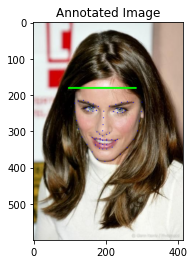

In [6]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.title('Annotated Image')
plt.show()

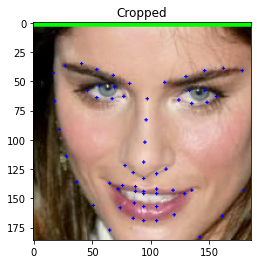

In [7]:
(x, y, w, h) = face_utils.rect_to_bb(face_rects[0])
cropped = img[y:y+h, x:x+w]
plt.imshow(cropped)
plt.title('Cropped')
plt.show()

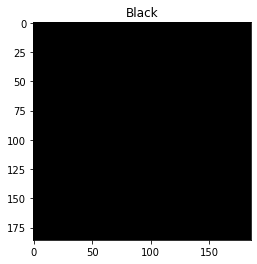

In [8]:
black = np.zeros((h, w, 1), dtype='uint8')
plt.imshow(np.squeeze(black), cmap='gray')
plt.title('Black')
plt.show()

In [9]:
shifted_pts = np.array([[pt[0] - x, pt[1] - y] for pt in pts])

In [10]:
def mark_pts(img, pts):
    for (x, y) in pts:
        #cv2.circle(img, (x, y), 1, 255, -1)
        cv2.rectangle(img, (x-1, y-1), (x+1, y+1), 255, -1)
mark_pts(black, shifted_pts)

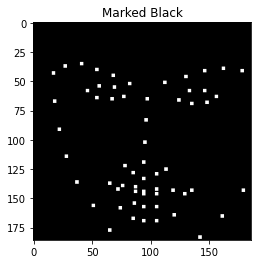

In [11]:
plt.imshow(np.squeeze(black), cmap='gray')
plt.title('Marked Black')
plt.show()

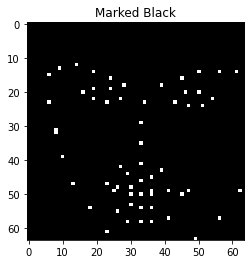

In [15]:
scaled = cv2.resize(black, (64, 64), interpolation=cv2.INTER_NEAREST)
plt.imshow(np.squeeze(scaled), cmap='gray')
plt.title('Marked Black')
plt.show()

In [13]:
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

NameError: name 'im_gray' is not defined